For this assignment, we will explore the use of clustering in two different ways: 
1. clustering as data exploration 
2. image compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### 1. Clustering as data exploration
For this application we will use clustering to group countries based on COVID-19 cases per million population. As we are living through this pandemic, it's interesting to see how different countries are doing compared to each other in terms of prevention and containment. The dataset to use is a modified dataset from [here](https://covidtracker.bsg.ox.ac.uk/). When we analyze COVID-19 data, there are a very variables we can look at, including cases, deaths, positivity rate, mortality, etc. It will also be important to make sure the values are comparable between countries, hence sometimes we will scale the data using the per million population as the scaling factor.

The given dataset contains the cumulative cases per million population of 180 countries. Note that the raw data from Covidtracker doesn't give you this value, so I had to modify it to obtain this data. We will be focusing on data from July 1st till Dec 31st. 

In [2]:
# Load data
data = pd.read_csv("covid.csv")
data.head()

,country_list,20200701,20200702,20200703,20200704,20200705,20200706,20200707,20200708,20200709,...,20201222,20201223,20201224,20201225,20201226,20201227,20201228,20201229,20201230,20201231
0,Aruba,964.726598,974.092876,974.092876,983.459154,983.459154,983.459154,983.459154,983.459154,983.459154,...,48695.277520,48966.899570,49238.521630,49341.550680,49519.509960,49688.102950,49856.695950,50325.009830,50971.282990,51411.498040
1,Afghanistan,817.553463,822.331473,830.089317,839.028820,846.195835,852.335320,857.318836,862.713364,870.779466,...,1289.292035,1295.534274,1301.237060,1305.218735,1307.171040,1311.101339,1317.292201,1319.090377,1320.503229,1323.611505
2,Angola,8.854063,9.584295,9.979837,10.527511,10.527511,10.527511,11.744564,11.744564,12.048828,...,511.223240,515.148237,518.130017,520.259860,521.781177,524.549973,526.253848,528.535823,530.422255,534.073415
3,Albania,896.518174,925.012162,956.286052,979.567725,1005.281812,1029.953437,1055.667524,1079.296685,1107.790673,...,18699.701160,18874.487460,19051.706160,19243.866840,19374.174720,19547.571060,19658.072140,19857.530060,20059.420390,20264.090620
4,Andorra,11065.812460,11065.812460,11065.812460,11065.812460,11065.812460,11065.812460,11065.812460,11065.812460,11065.812460,...,98789.878990,99255.807930,99644.082060,100381.802900,101028.926400,101223.063500,101921.956900,102491.425600,103319.743700,104173.946800


First store the country names in a different variable and remove it from the data set. Then scale the data, since the features are on different scale. Save the scaled data as a different variable.

In [3]:
# Remove Country Names
country_list = data['country_list']
data.drop('country_list', axis = 1, inplace = True)

In [4]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(data)

Notice this dataset doesn't have label, hence it's an excellent dataset to practice clustering (or unsupervised) techniques. We will use Hierarchical clustering, DBScan, and Gaussian Mixture Models on this dataset. K-Means will be used in the next exercise.

For each method, I want you to do the following:
1. Perform clustering that gives you between 3-5 clusters
2. Calculate the mean cases per million population of each cluster (using the unscaled data)
3. Print the countries that belong to each cluster
4. Describe your observations

Note that the order of the cluster assignments do not necessarily reflect the scale of the data, i.e. cluster 0 does not always correspond to the cluster with the lowest value. Be careful when you write your observations.

#### Hierarchical Clustering

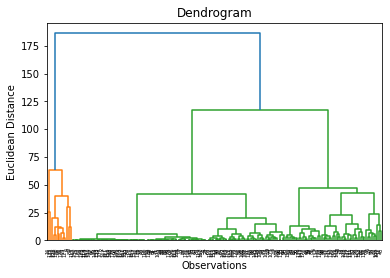

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(scaled_X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean Distance')
plt.show()

In [6]:
# Step -1: Perform clustering that gives you between 3-5 clusters
from sklearn.cluster import AgglomerativeClustering

AC3 = AgglomerativeClustering(n_clusters = 3)
AC3.fit(scaled_X)

AC4 = AgglomerativeClustering(n_clusters = 4)
AC4.fit(scaled_X)

AC5 = AgglomerativeClustering(n_clusters = 5)
AC5.fit(scaled_X)

AgglomerativeClustering(n_clusters=5)

<Figure size 1080x432 with 0 Axes>

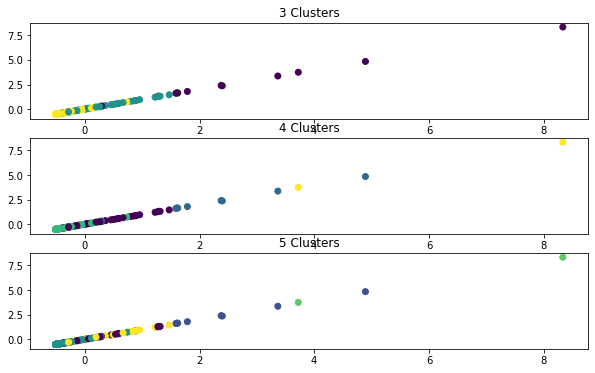

In [7]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots(3, figsize=(10, 6))


#plt.subplot(121)
ax[0].scatter(scaled_X[:,0], scaled_X[:,1], c = AC3.labels_)
ax[0].set_title('3 Clusters')

#plt.subplot(122)
ax[1].scatter(scaled_X[:,0], scaled_X[:,1], c = AC4.labels_)
ax[1].set_title('4 Clusters')

#plt.subplot(123)
ax[2].scatter(scaled_X[:,0], scaled_X[:,1], c = AC5.labels_)
ax[2].set_title('5 Clusters')

plt.show()

#### Step 1 :  I will choose 4 clusters - AC4

In [8]:
# 2. Calculate the mean cases per million population of each cluster (using the unscaled data)
country_mean = pd.DataFrame(data = data.mean(axis=1), columns = ['Mean cases per country'])
country_mean['Cluster'] = AC4.fit_predict(scaled_X)
country_mean['Country'] = country_list
country_mean = country_mean[['Country', 'Cluster', 'Mean cases per country']]
country_mean.head()

,Country,Cluster,Mean cases per country
0,Aruba,1,28643.705983
1,Afghanistan,2,1044.377143
2,Angola,2,220.998029
3,Albania,2,6855.189426
4,Andorra,1,43042.155877


In [9]:
#Getting mean per cluster
mean_per_cluster = country_mean.groupby(['Cluster']).mean()
mean_per_cluster.rename({'Mean cases per country':'Mean cases per Cluster'},axis = 1,inplace = True)
mean_per_cluster.head()

,Mean cases per Cluster
Cluster,
0,12151.640945
1,26572.421352
2,1973.356922
3,40949.922304


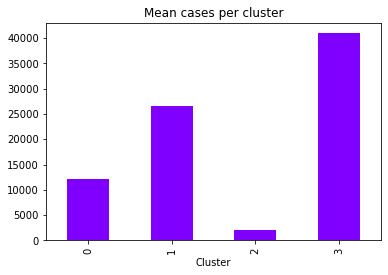

In [10]:
mean_per_cluster.plot(kind= 'bar',title= 'Mean cases per cluster',legend = False,colormap = 'rainbow')

In [11]:
#Getting count of countries in each cluster
Count_of_countries = country_mean.groupby(['Cluster']).count()
Count_of_countries.rename({'Country':'Count of countries in each cluster'},axis = 1,inplace = True)
del Count_of_countries['Mean cases per country']
Count_of_countries

,Count of countries in each cluster
Cluster,
0,52
1,11
2,115
3,2


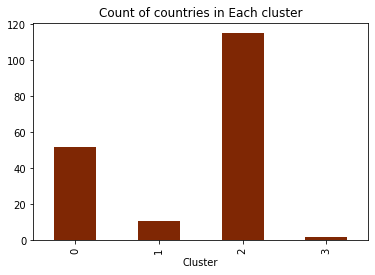

In [12]:
Count_of_countries.plot(kind='bar', title= 'Count of countries in Each cluster',legend = False,colormap = 'Oranges_r')

In [13]:
#3. Print the countries that belong to each cluster
Countries_In_Each_Cluster = country_mean.pivot_table(index = ['Cluster','Country'])
#Countries_In_Each_Cluster = Countries_In_Each_Cluster[['Cluster', 'Country']]
Countries_In_Each_Cluster

Mean cases per country
Cluster Country                          
0       Argentina            17662.951216
        Austria              12449.045896
        Bahamas              10584.868228
        Belarus              10216.496094
        Belgium              23099.436411
...                                   ...
2       Yemen                   65.064217
        Zambia                 701.602729
        Zimbabwe               483.273131
3       Bahrain              38606.109723
        Qatar                43293.734885

[180 rows x 1 columns]

#### Observations:
#### ---------------------------------------------------------------------------------------------------------------
#### Uneven clustering: 115 countries are in cluster 2 whereas only 2 countries are in cluster 3.
#### Even though cluster 3 has only 2 countries, the mean of countries in cluster 3 is the highest
#### Even though cluster 2 has 115 countries, the mean of countries in cluster 2 is the lowest

#### DBScan

In [14]:
# You may need to try different combinations of epsilon and min_samples to get to the appropriate number of clusters. 
# Use np.unique() to help you locate the unique number of clusters
# We will consider outliers as one cluster as well.

# Use as many boxes as you need


In [15]:
from sklearn.cluster import DBSCAN

dbscan1 = DBSCAN(eps = 0.05,min_samples = 4) # The default epsilon is 0.5 and min_samples is 5
dbscan1.fit(scaled_X)

dbscan2 = DBSCAN(eps=0.1, min_samples = 3) 
dbscan2.fit(scaled_X)

dbscan3 = DBSCAN(eps = 0.2, min_samples = 5)
dbscan3.fit(scaled_X)

dbscan4 = DBSCAN(eps = 0.2, min_samples = 10)
dbscan4.fit(scaled_X)

DBSCAN(eps=0.2, min_samples=10)

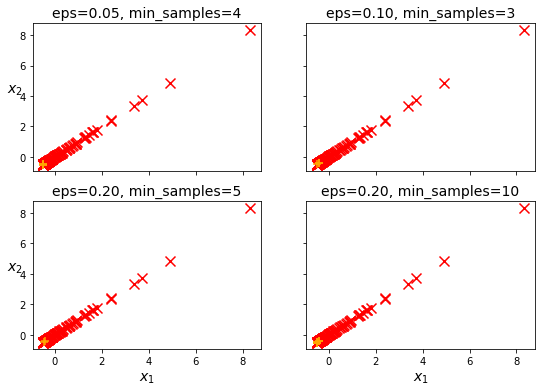

In [16]:
def plot_dbscan(dbscan, scaled_X, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool) # Generate an array of 0 of shape dbscan.labels_
    core_mask[dbscan.core_sample_indices_] = True # All core instances get a True
    anomalies_mask = dbscan.labels_ == -1  # Locate the anomalies
    non_core_mask = ~(core_mask | anomalies_mask) # The remainings are regular instances

    cores = dbscan.components_
    anomalies = scaled_X[anomalies_mask]
    non_cores = scaled_X[non_core_mask]
    
    # Plot the core points
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=10, c=dbscan.labels_[core_mask])
    
    # Plot the anomalies
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    # Plot the non core points
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c='orange', marker="+", s = 50)
    
    # Show the x and y axis
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
    
    
plt.figure(figsize=(9, 6))

plt.subplot(221)
plot_dbscan(dbscan1, scaled_X, show_xlabels = False, show_ylabels = True)

plt.subplot(222)
plot_dbscan(dbscan2, scaled_X, show_xlabels = False, show_ylabels= False)

plt.subplot(223)
plot_dbscan(dbscan3, scaled_X, show_ylabels = True)

plt.subplot(224)
plot_dbscan(dbscan4, scaled_X, show_ylabels = False)
plt.show()

In [17]:
np.unique(dbscan1.labels_) # Number of unique clusters for dbscan1

array([-1,  0,  1], dtype=int64)

In [18]:
np.unique(dbscan2.labels_) # Number of unique clusters for dbscan2

array([-1,  0,  1,  2], dtype=int64)

In [19]:
np.unique(dbscan3.labels_) # Number of unique clusters for dbscan3

array([-1,  0,  1], dtype=int64)

In [20]:
np.unique(dbscan4.labels_) # Number of unique clusters for dbscan4

array([-1,  0], dtype=int64)

#### From Number of unique clusters, dbscan2 is giving 4 clusters like AgglomerativeClustering. So we will choose that
#### Step 1: 4 clusters. 

In [21]:
# 2. Calculate the mean cases per million population of each cluster (using the unscaled data)
country_mean = pd.DataFrame(data = data.mean(axis=1), columns = ['Mean cases per country'])
country_mean['Cluster'] = dbscan2.fit_predict(scaled_X)
country_mean['Country'] = country_list
country_mean = country_mean[['Country', 'Cluster', 'Mean cases per country']]
country_mean.head()

,Country,Cluster,Mean cases per country
0,Aruba,-1,28643.705983
1,Afghanistan,-1,1044.377143
2,Angola,-1,220.998029
3,Albania,-1,6855.189426
4,Andorra,-1,43042.155877


In [22]:
#Getting mean per cluster
mean_per_cluster = country_mean.groupby(['Cluster']).mean()
mean_per_cluster.rename({'Mean cases per country':'Mean cases per Cluster'},axis = 1,inplace = True)
mean_per_cluster.head()

,Mean cases per Cluster
Cluster,
-1,8459.635709
0,71.097546
1,278.289097
2,743.610462


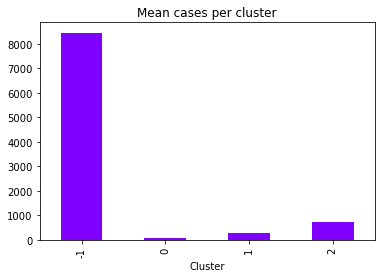

In [23]:
mean_per_cluster.plot(kind= 'bar',title= 'Mean cases per cluster',legend = False,colormap = 'rainbow')

In [24]:
#Getting count of countries in each cluster
Count_of_countries = country_mean.groupby(['Cluster']).count()
Count_of_countries.rename({'Country':'Count of countries in each cluster'},axis = 1,inplace = True)
del Count_of_countries['Mean cases per country']
Count_of_countries

,Count of countries in each cluster
Cluster,
-1,145
0,23
1,9
2,3


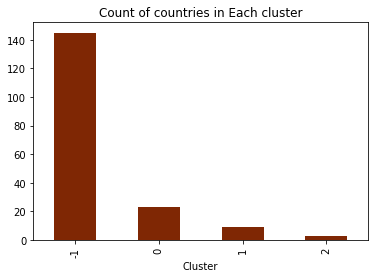

In [25]:
Count_of_countries.plot(kind='bar', title= 'Count of countries in Each cluster',legend = False,colormap = 'Oranges_r')

In [26]:
#3. Print the countries that belong to each cluster
Countries_In_Each_Cluster = country_mean.pivot_table(index = ['Cluster','Country'])
#Countries_In_Each_Cluster = Countries_In_Each_Cluster[['Cluster', 'Country']]
Countries_In_Each_Cluster

Mean cases per country
Cluster Country                              
-1      Afghanistan               1044.377143
        Albania                   6855.189426
        Algeria                   1234.395928
        Andorra                  43042.155877
        Angola                     220.998029
...                                       ...
 1      South Sudan                243.134969
        Sudan                      330.250535
 2      Cote d'Ivoire              709.898870
        Guinea                     789.820130
        Nicaragua                  731.112386

[180 rows x 1 columns]

#### Observations:
#### ---------------------------------------------------------------------------------------------------------------
#### Uneven clustering: 145 countries are in cluster -1 whereas only 3 countries are in cluster 2.

#### GMM

In [27]:
from sklearn.mixture import GaussianMixture
# Note that GMM is not really a clustering algorithm. It's a mixture model, that can be used as a clustering algorithm.

gm = GaussianMixture(n_components=4, n_init=10, random_state=42)
gm.fit(scaled_X)

GaussianMixture(n_components=4, n_init=10, random_state=42)

In [28]:
# 2. Calculate the mean cases per million population of each cluster (using the unscaled data)
country_mean = pd.DataFrame(data = data.mean(axis=1), columns = ['Mean cases per country'])
country_mean['Cluster'] = gm.fit_predict(scaled_X)
country_mean['Country'] = country_list
country_mean = country_mean[['Country', 'Cluster', 'Mean cases per country']]
country_mean.head()

,Country,Cluster,Mean cases per country
0,Aruba,2,28643.705983
1,Afghanistan,1,1044.377143
2,Angola,1,220.998029
3,Albania,0,6855.189426
4,Andorra,2,43042.155877


In [29]:
#Getting mean per cluster
mean_per_cluster = country_mean.groupby(['Cluster']).mean()
mean_per_cluster.rename({'Mean cases per country':'Mean cases per Cluster'},axis = 1,inplace = True)
mean_per_cluster.head()

,Mean cases per Cluster
Cluster,
0,8639.262975
1,1148.651791
2,28784.344575
3,16541.597416


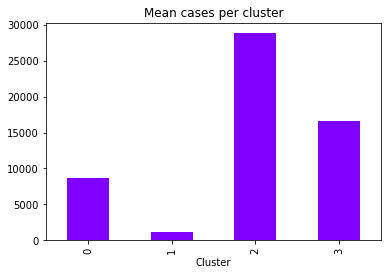

In [30]:
mean_per_cluster.plot(kind= 'bar',title= 'Mean cases per cluster',legend = False,colormap = 'rainbow')

In [31]:
#Getting count of countries in each cluster
Count_of_countries = country_mean.groupby(['Cluster']).count()
Count_of_countries.rename({'Country':'Count of countries in each cluster'},axis = 1,inplace = True)
del Count_of_countries['Mean cases per country']
Count_of_countries

,Count of countries in each cluster
Cluster,
0,50
1,98
2,13
3,19


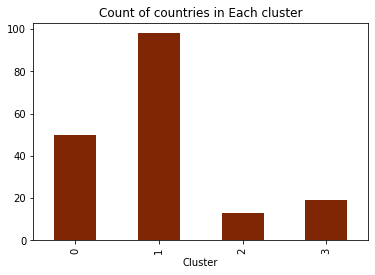

In [32]:
Count_of_countries.plot(kind='bar', title= 'Count of countries in Each cluster',legend = False,colormap = 'Oranges_r')

In [33]:
#3. Print the countries that belong to each cluster
Countries_In_Each_Cluster = country_mean.pivot_table(index = ['Cluster','Country'])
#Countries_In_Each_Cluster = Countries_In_Each_Cluster[['Cluster', 'Country']]
Countries_In_Each_Cluster

Mean cases per country
Cluster Country                            
0       Albania                 6855.189426
        Azerbaijan              6691.459654
        Bahamas                10584.868228
        Belarus                10216.496094
        Belize                  7835.692455
...                                     ...
3       Portugal               13824.432752
        Slovenia               14328.210350
        Spain                  19308.048654
        Sweden                 14483.641005
        Switzerland            16445.998767

[180 rows x 1 columns]

#### Observations:
#### ---------------------------------------------------------------------------------------------------------------
#### GMM is the best clustering method for this dataset. 
#### Clustering is partially even even though many countries are in cluster 1


# Image compression using K-Means
Another application of clustering is image compression, which is also known as color quantization. In simple words, the idea is to represent an image using a fewer number of colors (hence achieving a compression). Part of this exercise is taken from [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

An image is essentially a bunch of pixels grouped together. A pixel ranges from 0 - 255, where 0 presents dark and 255 white. For colored images, it can be presented as a 3D array of dimension m x n x 3, where the 3 dimensions represent RGB colors. 

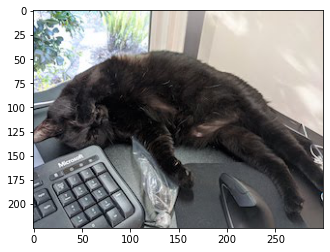

In [34]:
# Let's load the image
from matplotlib.image import imread
img = imread('cat.jpg')
plt.imshow(img)
plt.show()

This is one of my cats. I will let you admire its laziness. 

In [35]:
# This is the image size
img_size = img.shape
img_size

(225, 300, 3)

The image has dimension 225 x 300 x 3. Think of it as a matrix with 3 layers, where each layer is of dimension 225 x 300. If you explore the image, you will see it consists of many random values:

In [36]:
print(img)

[[[187 204 220]
  [214 232 246]
  [217 234 244]
  ...
  [224 214 205]
  [224 214 205]
  [224 214 205]]

 [[205 222 229]
  [225 242 249]
  [210 225 232]
  ...
  [226 216 207]
  [225 215 206]
  [225 215 206]]

 [[212 227 222]
  [245 255 255]
  [244 255 255]
  ...
  [224 214 205]
  [224 214 205]
  [223 213 204]]

 ...

 [[ 93 102 111]
  [103 112 121]
  [108 117 126]
  ...
  [109 104 101]
  [109 104 101]
  [109 104 101]]

 [[106 115 124]
  [109 118 127]
  [111 120 129]
  ...
  [110 105 102]
  [109 104 101]
  [109 104 101]]

 [[ 98 115 125]
  [ 98 115 125]
  [101 115 126]
  ...
  [106 102 101]
  [104 103 101]
  [104 103 101]]]


Each row is a pixel on the image. The goal here is to group similar pixels by replace it with the cluster mean. We will use KMeans to achieve this.

In [37]:
# First reshape it to be 2-dimensional
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X.shape)

(67500, 3)


Here is your first task. Run K-Means on this reshaped data set with 30 clusters. Name your model ***compressed***.

In [38]:
# Run the Kmeans algorithm
from sklearn.cluster import KMeans

compressed = KMeans(n_clusters=30, random_state = 42)
compressed.fit(X)

KMeans(n_clusters=30, random_state=42)

Now let's plot the original image and the compressed image, and compare the difference.

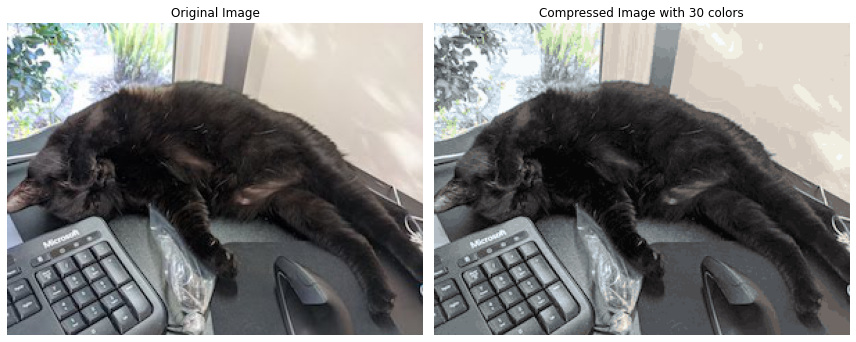

In [39]:
# Use the centroids to compress the image
X_compressed = compressed.cluster_centers_[compressed.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 225 * 300 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

#### Observations:
#### ---------------------------------------------------------------------------------------------------------------
#### Light green colour is intact. But dark green got darker. 
#### Quality is reduced because of compression but most of the primary colours are still good.

Now I want you to repeat the same procedure, but use the inertia to determine the best K value (it may take awhile to run for large K values).

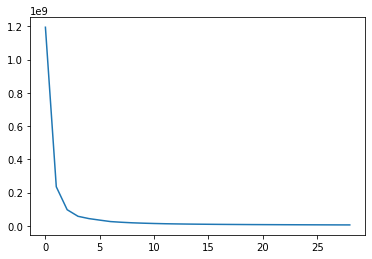

In [40]:
# Find best K
inertia_score = [KMeans(n_clusters= i, random_state=42).fit(X).inertia_ for i in range(1, 30)]
plt.plot(inertia_score)

In [41]:
#Elbow is at 3 clusters.

In [42]:
# Redo the compression with your selected K value
compressed2 = KMeans(n_clusters = 3 , random_state = 42)
compressed2.fit(X)

KMeans(n_clusters=3, random_state=42)

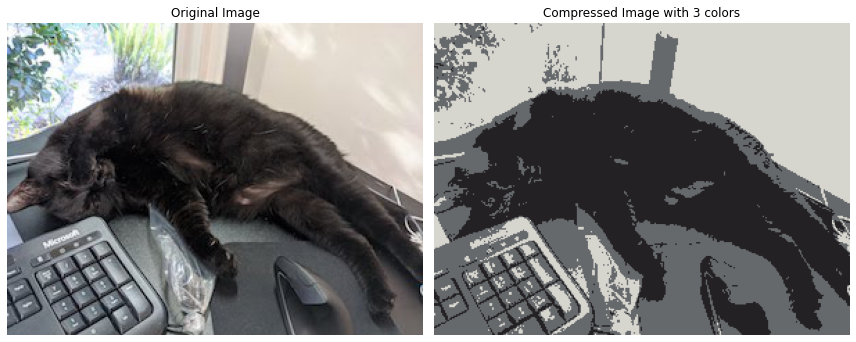

In [43]:
# Plot the old and new image
# Use the centroids to compress the image
X_compressed = compressed2.cluster_centers_[compressed2.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 225 * 300 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

#### Observations:
#### ---------------------------------------------------------------------------------------------------------------
#### Drastic reduction in Quality. Primary colours(RGB) are unrecognizable. Cat doesn't look like a cat even though hands and legs are visible. Keyboard can be recognized.